In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
file_path = "../../data/"
file_name = "wind_hourly_cleaned.csv"

In [4]:
wind_hourly = pd.read_csv(os.path.join(file_path, file_name))

In [5]:
wind_hourly.head()

,datetime,wind_speed
0,2024-01-01 00:00:00,0.100000
1,2024-01-01 01:00:00,0.283333
2,2024-01-01 02:00:00,0.200000
3,2024-01-01 03:00:00,0.500000
4,2024-01-01 04:00:00,0.966667


In [6]:
wind_hourly.describe()

,wind_speed
count,10149.000000
mean,2.285190
std,1.841266
min,0.000000
25%,0.866667
50%,1.916667
75%,3.216667
max,9.800000


In [8]:
wind_hourly.isnull().sum()

datetime      0
wind_speed    0
dtype: int64

In [9]:
wind_hourly = wind_hourly.set_index("datetime")

In [12]:
wind_hourly.head()

,wind_speed
datetime,
2024-01-01 00:00:00,0.100000
2024-01-01 01:00:00,0.283333
2024-01-01 02:00:00,0.200000
2024-01-01 03:00:00,0.500000
2024-01-01 04:00:00,0.966667


In [16]:
wind_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10149 entries, 0 to 10148
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10149 non-null  object 
 1   wind_speed  10149 non-null  float64
dtypes: float64(1), object(1)
memory usage: 158.7+ KB


In [14]:
wind_hourly.reset_index(inplace=True)

In [15]:
wind_hourly.head()

,datetime,wind_speed
0,2024-01-01 00:00:00,0.100000
1,2024-01-01 01:00:00,0.283333
2,2024-01-01 02:00:00,0.200000
3,2024-01-01 03:00:00,0.500000
4,2024-01-01 04:00:00,0.966667


In [17]:
wind_hourly['datetime'] = pd.to_datetime(wind_hourly['datetime'])

In [18]:
wind_hourly = wind_hourly.set_index('datetime')

In [19]:
wind_hourly.describe()

,wind_speed
count,10149.000000
mean,2.285190
std,1.841266
min,0.000000
25%,0.866667
50%,1.916667
75%,3.216667
max,9.800000


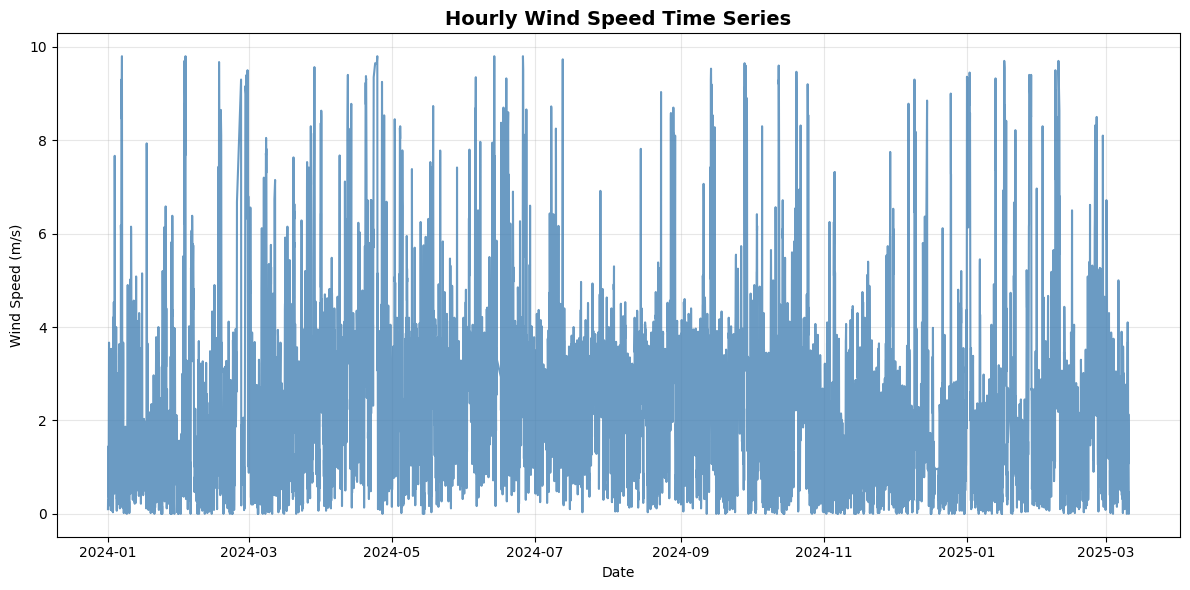

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=wind_hourly, x=wind_hourly.index, y="wind_speed", color='steelblue', alpha=0.8)
plt.title("Hourly Wind Speed Time Series", fontsize=14, fontweight='bold')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
wind_hourly['year'] = wind_hourly.index.year
wind_hourly['month'] = wind_hourly.index.month
wind_hourly.reset_index(inplace=True)
wind_hourly['week'] = wind_hourly['datetime'].dt.isocalendar().week
wind_hourly['hour'] = wind_hourly['datetime'].dt.hour
wind_hourly['day'] = wind_hourly['datetime'].dt.dayofweek
wind_hourly['day_str'] = wind_hourly['datetime'].dt.strftime('%a')
wind_hourly['year_month'] = wind_hourly['datetime'].dt.strftime('%Y_%m')


In [27]:
wind_hourly.set_index('datetime', inplace=True)

In [28]:
wind_hourly.head()

,wind_speed,year,month,week,hour,day,day_str,year_month
datetime,,,,,,,,
2024-01-01 00:00:00,0.100000,2024,1,1,0,0,Mon,2024_01
2024-01-01 01:00:00,0.283333,2024,1,1,1,0,Mon,2024_01
2024-01-01 02:00:00,0.200000,2024,1,1,2,0,Mon,2024_01
2024-01-01 03:00:00,0.500000,2024,1,1,3,0,Mon,2024_01
2024-01-01 04:00:00,0.966667,2024,1,1,4,0,Mon,2024_01


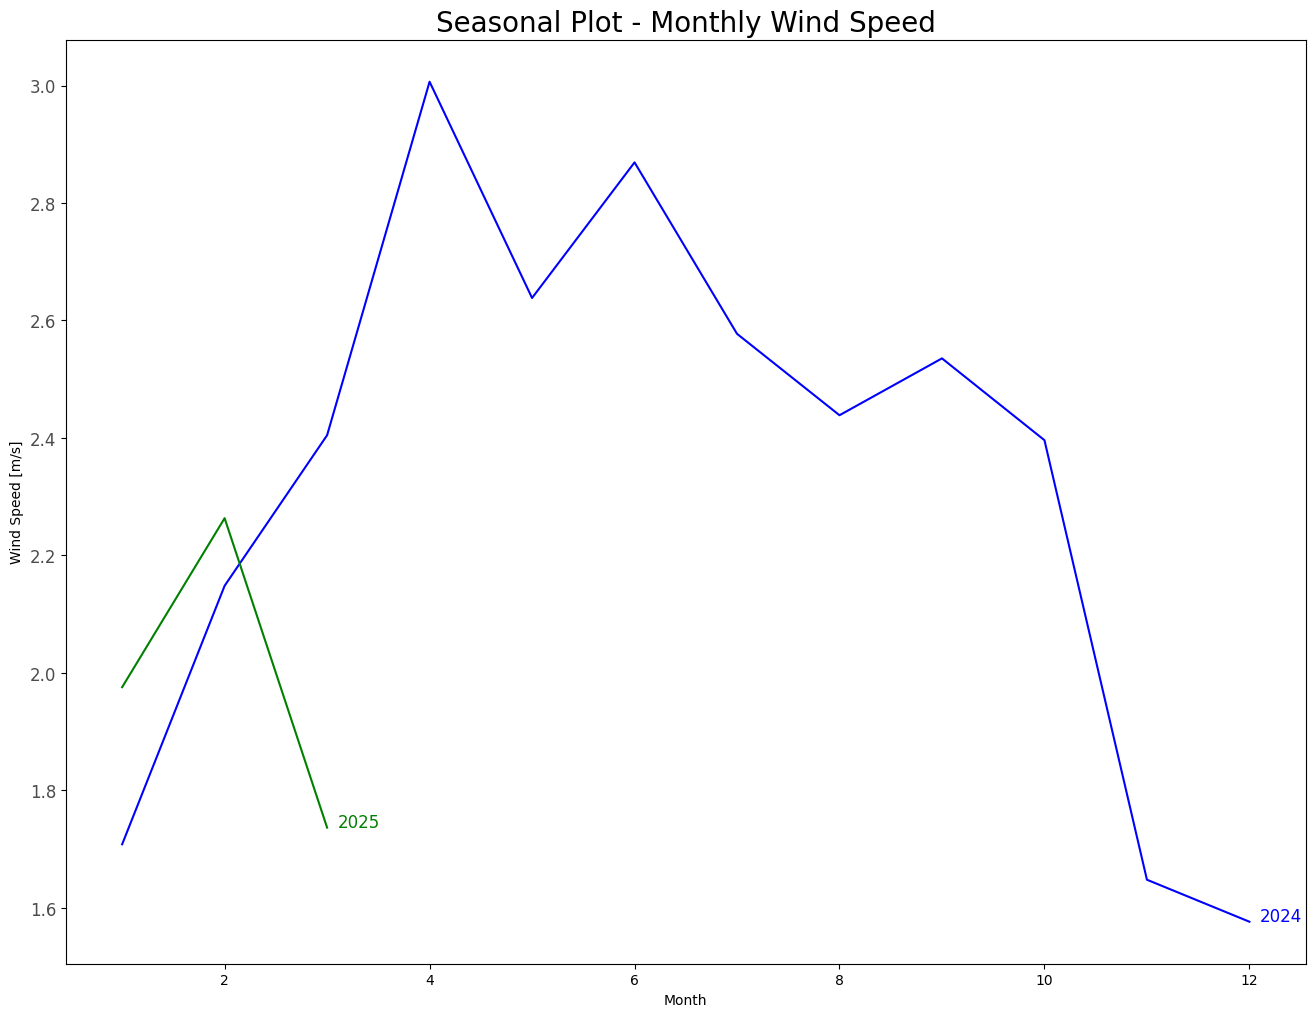

In [29]:
np.random.seed(42)
wind_plot = wind_hourly[['month', 'year', 'wind_speed']].dropna().groupby(['month', 'year']).mean()[['wind_speed']].reset_index()
years = wind_plot['year'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'black']

plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i < len(colors):
        plt.plot('month', 'wind_speed', data=wind_plot[wind_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(wind_plot.loc[wind_plot.year==y, :].shape[0]+0.3, wind_plot.loc[wind_plot.year==y, 'wind_speed'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(wind_plot.loc[wind_plot.year==y, :].shape[0]+0.1, wind_plot.loc[wind_plot.year==y, 'wind_speed'][-1:].values[0], y, fontsize=12, color=colors[i])

plt.gca().set(ylabel= 'wind_speed', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Wind Speed", fontsize=20)
plt.ylabel('Wind Speed [m/s]')
plt.xlabel('Month')
plt.show()

/tmp/ipykernel_122185/3474415709.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(months)).colors


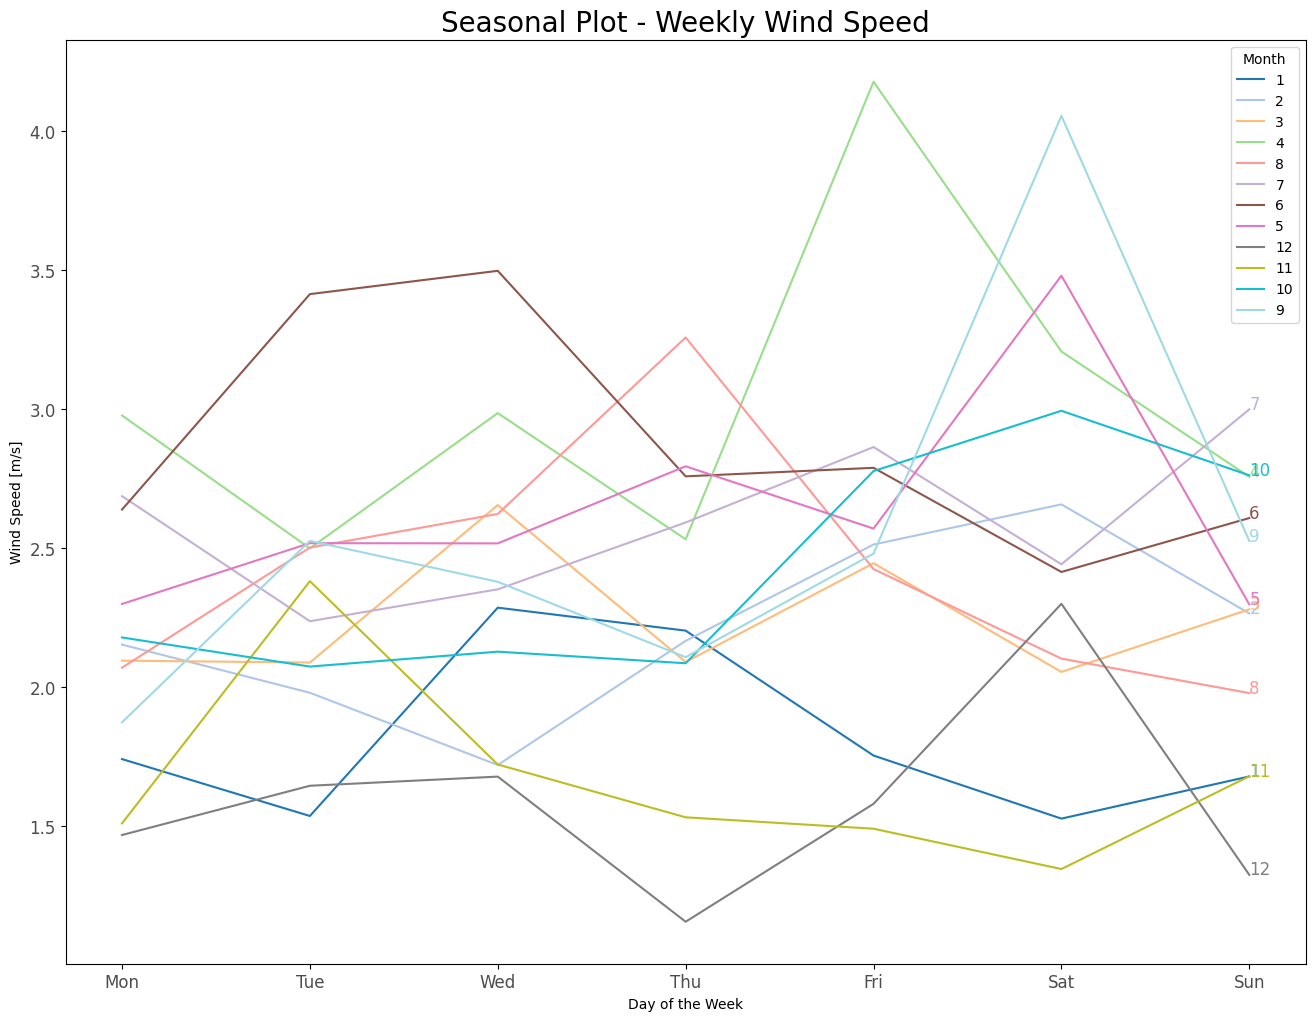

In [30]:
np.random.seed(42)
wind_plot = wind_hourly[['month', 'day_str', 'wind_speed', 'day']].dropna()
wind_plot = wind_plot.groupby(['day_str', 'month', 'day']).mean()[['wind_speed']].reset_index()
wind_plot = wind_plot.sort_values(by='day', ascending=True)

months = wind_plot['month'].unique()
colors = plt.cm.get_cmap('tab20', len(months)).colors

plt.figure(figsize=(16, 12))
for i, month in enumerate(months):
    month_data = wind_plot[wind_plot['month'] == month]
    plt.plot(month_data['day_str'], month_data['wind_speed'], color=colors[i], label=month)
    plt.text(len(month_data['day_str']) - 1, month_data['wind_speed'].iloc[-1], month, fontsize=12, color=colors[i])

plt.xlabel('Day of the Week')
plt.ylabel('Wind Speed [m/s]')
plt.title('Seasonal Plot - Weekly Wind Speed', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month')
plt.show()

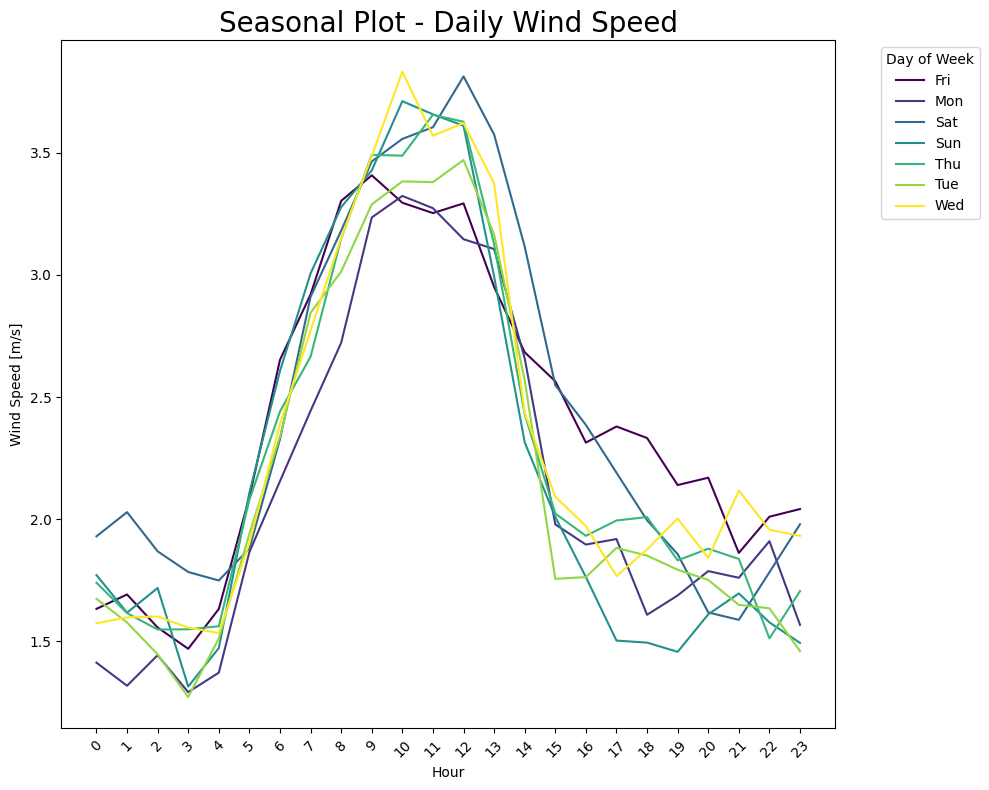

In [31]:
wind_plot = wind_hourly[['hour', 'day_str', 'wind_speed']].dropna()
wind_plot = wind_plot.groupby(['hour', 'day_str']).mean().reset_index()

plt.figure(figsize=(10, 8))
days = wind_plot['day_str'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))

for i, day in enumerate(days):
    day_data = wind_plot[wind_plot['day_str'] == day]
    plt.plot(day_data['hour'], day_data['wind_speed'], label=day, color=colors[i])

plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)], rotation=45)
plt.title("Seasonal Plot - Daily Wind Speed", fontsize=20)
plt.ylabel('Wind Speed [m/s]')
plt.xlabel('Hour')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

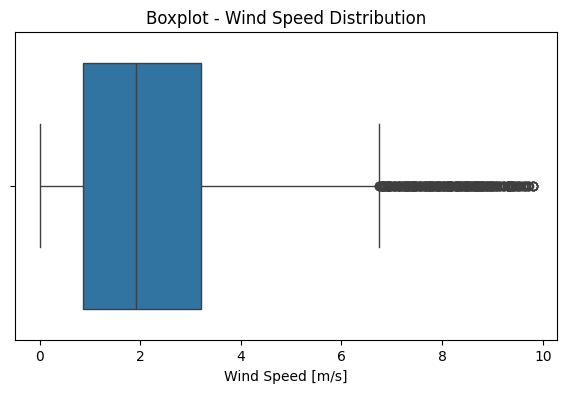

In [32]:
plt.figure(figsize=(7,4))
sns.boxplot(data=wind_hourly, x='wind_speed')
plt.xlabel('Wind Speed [m/s]')
plt.title('Boxplot - Wind Speed Distribution')
plt.show()

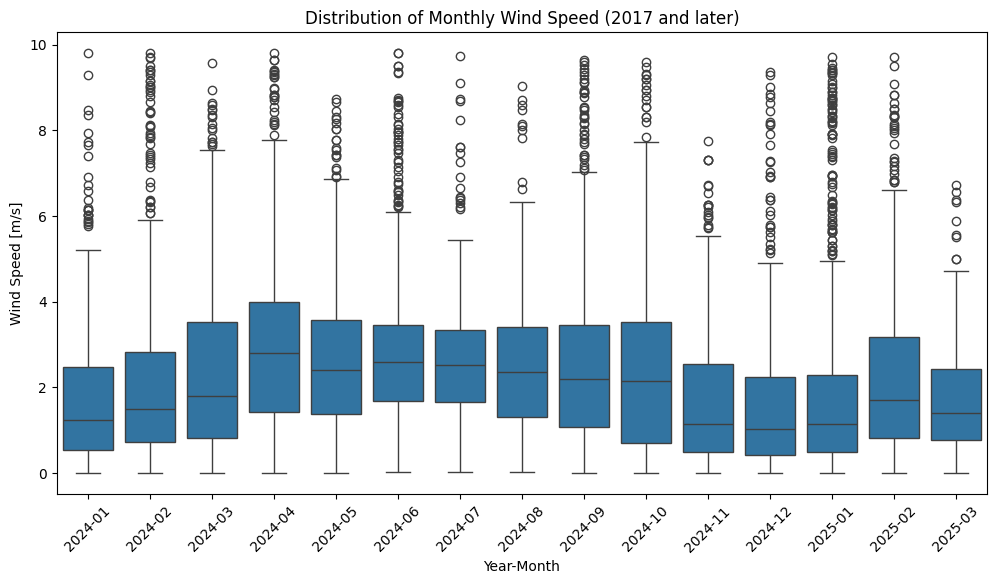

In [33]:
wind_hourly['year'] = wind_hourly.index.year
wind_hourly['month'] = wind_hourly.index.month
wind_hourly['year_month'] = wind_hourly.index.strftime('%Y-%m')

wind_plot = wind_hourly[wind_hourly['year'] >= 2017]

plt.figure(figsize=(12, 6))
sns.boxplot(x='year_month', y='wind_speed', data=wind_plot)
plt.title('Distribution of Monthly Wind Speed (2017 and later)')
plt.xlabel('Year-Month')
plt.ylabel('Wind Speed [m/s]')
plt.xticks(rotation=45)
plt.show()

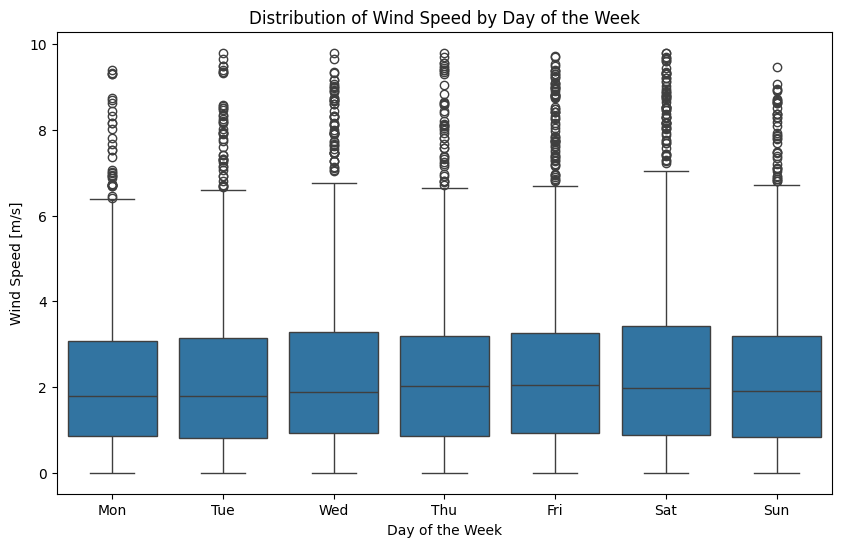

In [34]:
wind_plot = wind_hourly[['day_str', 'day', 'wind_speed']].sort_values(by='day')

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_str', y='wind_speed', data=wind_plot)
plt.title('Distribution of Wind Speed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Wind Speed [m/s]')
plt.show()

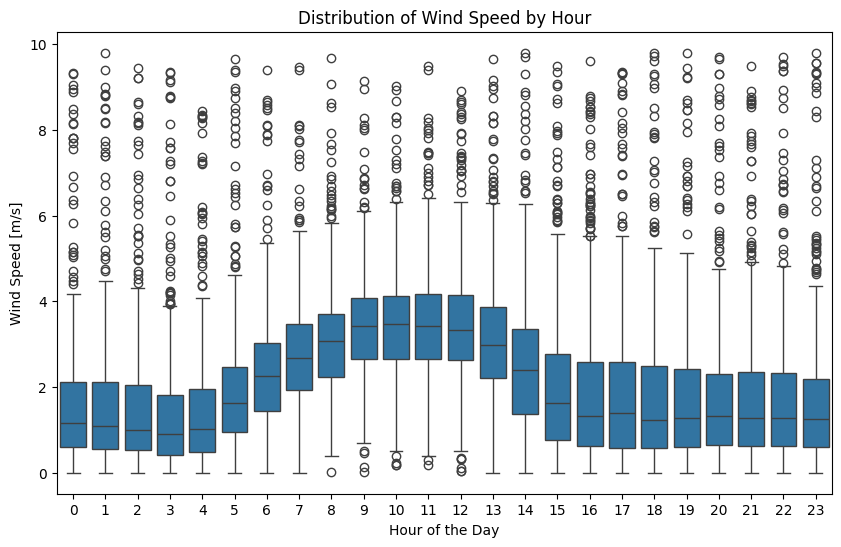

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=wind_hourly['hour'], y=wind_hourly['wind_speed'])
plt.title('Distribution of Wind Speed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Wind Speed [m/s]')
plt.show()

In [38]:
print(f"Available years in data: {wind_hourly['year'].unique()}")
print(f"Data shape: {wind_hourly.shape}")
print(f"Date range: {wind_hourly.index.min()} to {wind_hourly.index.max()}")

Available years in data: [2024 2025]
Data shape: (10149, 8)
Date range: 2024-01-01 00:00:00 to 2025-03-10 23:00:00


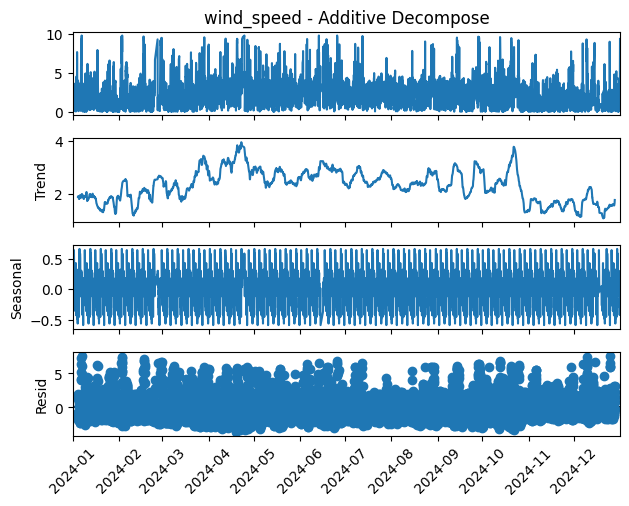

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

wind_plot = wind_hourly[wind_hourly['year'] == 2024].copy()
wind_plot = wind_plot.drop_duplicates().sort_index()

if len(wind_plot) >= 336:
    wind_plot['wind_speed - Additive Decompose'] = wind_plot['wind_speed']

    result_add = seasonal_decompose(wind_plot['wind_speed - Additive Decompose'], model='additive', period=24*7)

    result_add.plot().suptitle('', fontsize=22)
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Not enough data for decomposition. Required: 336, Available: {len(wind_plot)}")

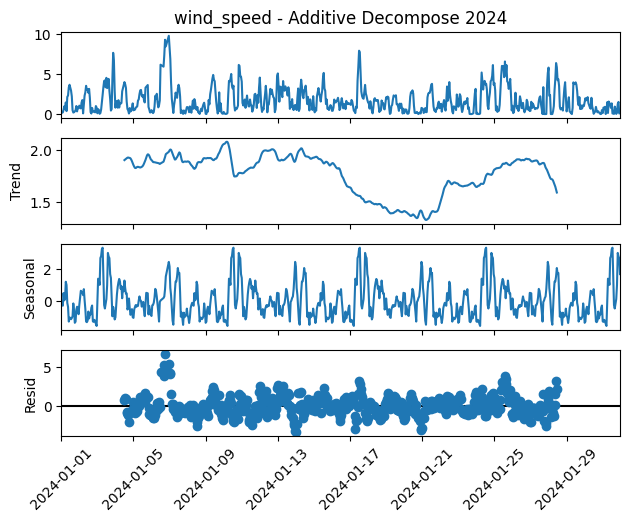

In [46]:
wind_plot = wind_hourly[(wind_hourly['year'] == 2024)].reset_index()
wind_plot = wind_plot[wind_plot['month'] == 1]
wind_plot['wind_speed - Additive Decompose 2024'] = wind_plot['wind_speed']
wind_plot = wind_plot.drop_duplicates(subset=['datetime']).sort_values(by='datetime')
wind_plot = wind_plot.set_index('datetime')

result_add = seasonal_decompose(wind_plot['wind_speed - Additive Decompose 2024'], model='additive', period=24*7)

result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

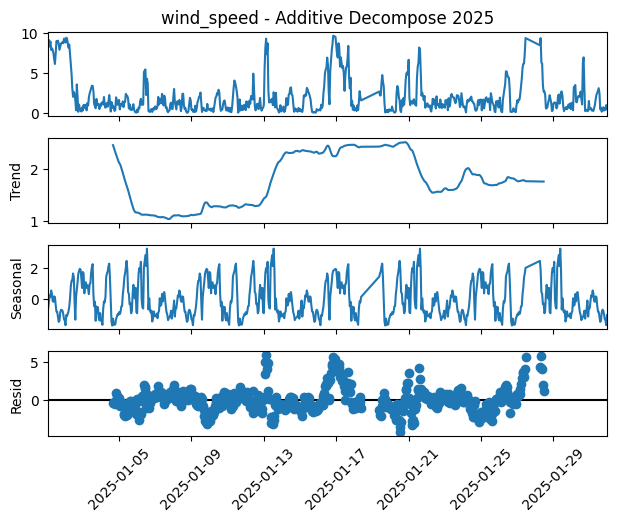

In [47]:
wind_plot = wind_hourly[(wind_hourly['year'] == 2025)].reset_index()
wind_plot = wind_plot[wind_plot['month'] == 1]
wind_plot['wind_speed - Additive Decompose 2025'] = wind_plot['wind_speed']
wind_plot = wind_plot.drop_duplicates(subset=['datetime']).sort_values(by='datetime')
wind_plot = wind_plot.set_index('datetime')

result_add = seasonal_decompose(wind_plot['wind_speed - Additive Decompose 2025'], model='additive', period=24*7)

result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

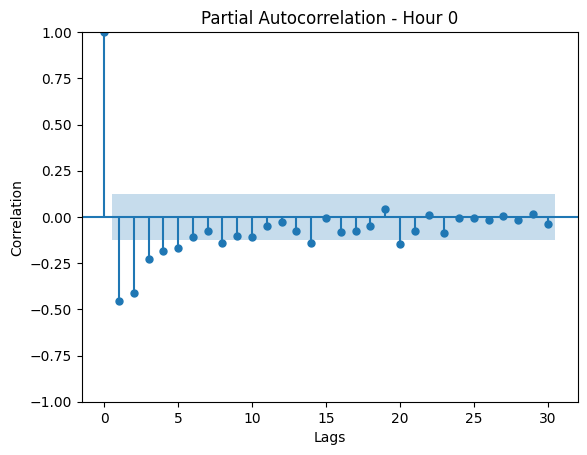

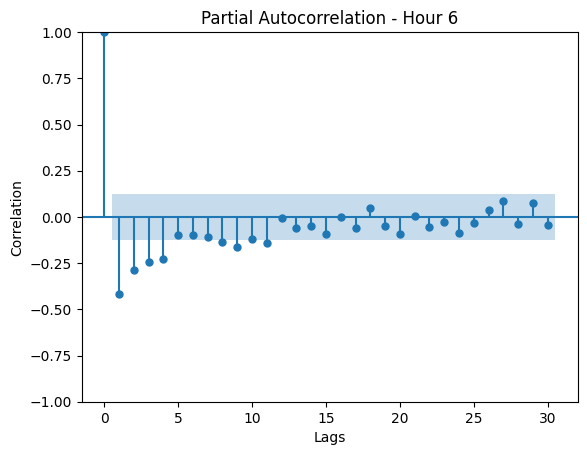

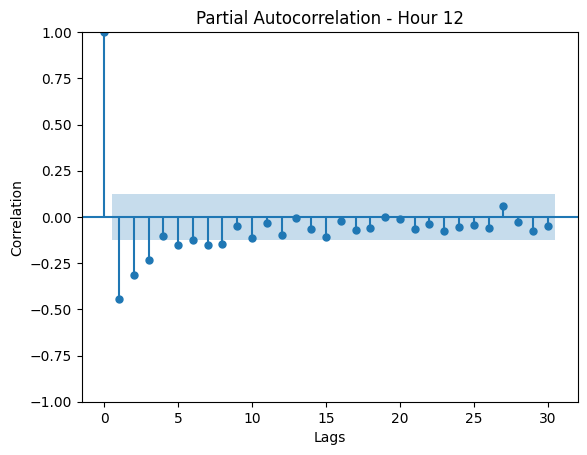

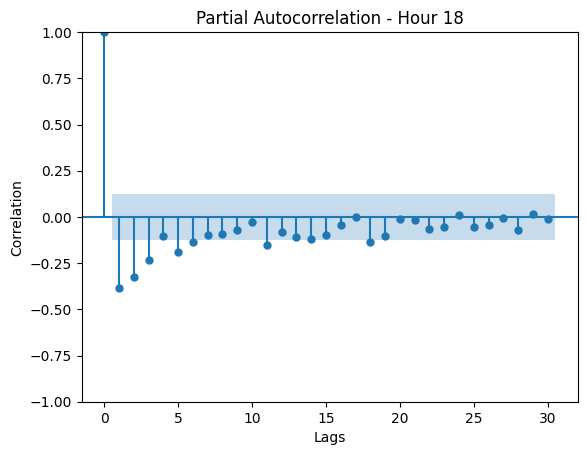

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf

actual = wind_hourly['wind_speed']
hours_of_interest = range(0, 24, 6)

for hour in hours_of_interest:
    hour_data = actual[actual.index.hour == hour].diff().dropna()
    plot_pacf(hour_data, lags=30, alpha=0.01)
    plt.title(f'Partial Autocorrelation - Hour {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()